In [1]:
import os
import numpy as np

import torch
torch.manual_seed(29)
from torch import nn
from torch.autograd import Variable
import torch.backends.cudnn as cudnn
import torch.nn.parallel
cudnn.benchmark = True
from torch.utils.data import DataLoader

from torchstat import stat
from utils import  models
from utils.data import dataset_1
from utils.trainer_utils import parfilter

from PIL import Image, ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [2]:
def psnr_metric(T, P, max = 1.0):
    mse = torch.mean((T - P) ** 2)
    return 20 * torch.log10(max / torch.sqrt(mse))

In [3]:
img_file = "/media/narsi/LargeData/DATASETS/superrez/DVI2K/DIV2K_train_HR/0001.png"

In [4]:
I = Image.open(img_file).resize((512, 512), Image.BICUBIC)

In [16]:
model = models.QuantACTShuffleV2()
check_point_file = "/media/narsi/LargeData/SP_2020/compressACT/weights/QuantACTShuffleV2_exp01/model_best.pth.tar"
checkpoint = torch.load(check_point_file)
model.load_state_dict(checkpoint['state_dict'])

<All keys matched successfully>

In [17]:
I1 = np.float32(I)[:256, :256, :]
I1 = np.transpose(I1, [2, 0, 1])
It = torch.from_numpy(np.expand_dims(I1, 0))/255.0

In [ ]:
It = It.view(1, 3, 64, 512//64, 64, 512//64).permute(0,3,5,1,2,4).contiguous().view(-1,3,32,32)

In [18]:
X = model(It)

In [19]:
psnr_metric(It, X)

tensor(25.6286, grad_fn=<MulBackward0>)

In [20]:
from matplotlib import pyplot as plt

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


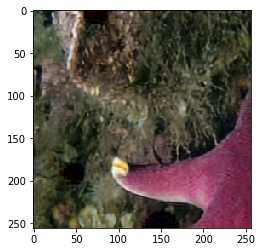

In [21]:
plt.imshow(X.squeeze().data.cpu().numpy().transpose([1, 2, 0]))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


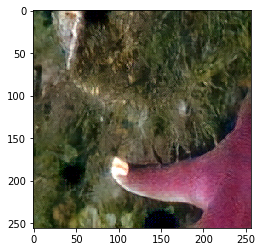

In [10]:
plt.imshow(X.squeeze().data.cpu().numpy().transpose([1, 2, 0]))

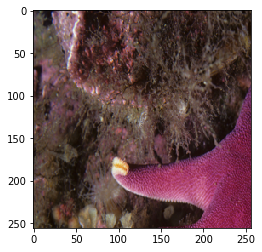

In [11]:
plt.imshow(np.uint8(I)[:256, :256, :])

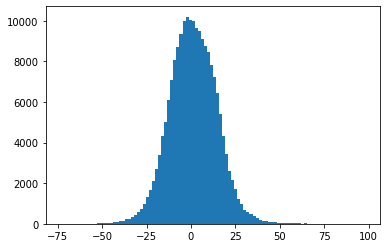

In [22]:
x =plt.hist(255 * (It-X).cpu().data.numpy().reshape(-1), bins = 100)

In [23]:
Xe = model.encode(It)

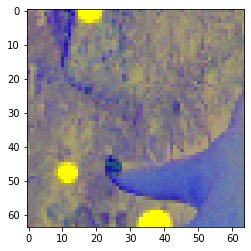

In [24]:
Xe = (Xe + 1.0)/2
plt.imshow(Xe.squeeze().data.cpu().numpy().transpose([1, 2, 0]))

In [43]:
model = models.QuantACTShuffleV2()
model.cuda()
print('.')

.


In [48]:
I = torch.randn(8, 3, 256, 256).cuda()

In [49]:
%timeit model.encode(I)

4.98 ms ± 39.3 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [50]:
I = torch.randn(8, 3, 64, 64).cuda()

In [51]:
%timeit model.decode(I)

6.24 ms ± 22.7 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [36]:
X = Xe.data.cpu().numpy()

In [ ]:
model.encode(I).size()

In [22]:
X = np.reshape(X, (-1))

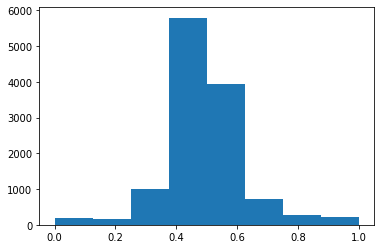

In [23]:
x = plt.hist(X, bins = 8)

In [ ]:
prob = [15629.0/32768, 17139.0/32768]

In [ ]:
from range_coder import RangeEncoder, RangeDecoder, prob_to_cum_freq


In [ ]:
data = np.asarray(X==1, dtype = int).tolist()

# convert probabilities to cumulative integer frequency table
cumFreq = prob_to_cum_freq(prob, resolution=1024)

# encode data
encoder = RangeEncoder('test.txt')
encoder.encode(data, cumFreq)
encoder.close()

decoder = RangeDecoder('test.txt')
dataRec = decoder.decode(len(data), cumFreq)
decoder.close()

In [ ]:
Xe = Xe.view(32,16,8)

In [ ]:
X = Xe.data.cpu().numpy()

In [ ]:
X = np.uint8(X==1)

In [ ]:
x = plt.hist(np.packbits(X).reshape(-1))

In [ ]:
plt.imshow(np.packbits(X).reshape(32,32))

In [ ]:
Image.fromarray(np.packbits(X).reshape(32,32)).save('test1.png')

In [26]:
Image.fromarray(np.uint8(X*255).reshape(64,64, 3)).save('test1.png')

In [27]:
Image.fromarray(np.uint8(I)[:256, :256, :]).save('test.jpg', quality = 35)

In [28]:
os.path.getsize('test1.png')/(256*256)

0.15716552734375

In [ ]:
os.path.getsize('test.png')/(64*64)

In [30]:
os.path.getsize('test.jpg')/(256*256)

0.1186676025390625

In [ ]:
Image.open('test.jpg')

In [ ]:
Image.open('test.png')

In [ ]:
Image.open('test1.png')

In [ ]:
Image.fromarray(np.uint8(255 * X.squeeze().data.cpu().numpy().transpose([1, 2, 0])))